In [1]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('~/Desktop/hw3.csv')

In [58]:
df.head(5)

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [59]:
for i in df.columns:
    print(i,df[i].isna().sum())

ts 0
open 0
high 504
low 289
close 136
volume 0
volumeUSD 2667
token 0
chain 0


In [60]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [61]:
df['volumeUSD']=df['volumeUSD'].fillna(0)

In [62]:
tmp = df.dropna()

In [63]:
tmp

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,0.0,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,0.0,CRV,ETH
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,0.0,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,0.0,SOL,SOL
5,2021-12-08 12:00:00,3.8405,3.8789,3.7900,3.8392,3.788895e+05,0.0,CRV,ETH
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,0.0,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,0.0,AAVE,ETH
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,0.0,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,0.0,ETH,ETH


In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(tmp['high'],tmp['open'])*10000
# which means I could use open to refill high

9999.238585138417

In [66]:
r2_score(tmp['low'],tmp['open'])*10000

9997.81347758713

In [67]:
r2_score(tmp['close'],tmp['open'])*10000
# There's some problem 

182.5753164781907

In [74]:
df['high']=df['high'].fillna(df['open'])
df['low']= df['low'].fillna(df['open'])

In [75]:
df.sort_values(by='close',ascending=False).head(10)

,ts,open,high,low,close,volume,volumeUSD,token,chain
127,2021-12-12 14:00:00,49542.39,49542.39,49534.71,4983812.00,342.670409,0.0,BTC,BTC
955,2021-12-05 11:00:00,49113.55,49113.55,49113.55,4936795.00,621.159777,0.0,"<span name=""tokenName"">BTC</span>",BTC
1962,2021-12-09 13:00:00,4307.44,4307.44,4268.88,431046.00,6367.062495,0.0,"<span name=""tokenName"">ETH</span>",ETH
1233,2021-12-09 13:00:00,4307.44,4307.44,4268.88,431046.00,6367.062495,0.0,"<span name=""tokenName"">ETH</span>",ETH
1439,2021-12-01 16:00:00,58610.19,58610.19,58349.19,58664.40,684.590976,0.0,BTC,BTC
1480,2021-12-01 16:00:00,58610.19,58610.19,58349.19,58664.40,684.590976,0.0,BTC,BTC
1842,2021-12-01 15:00:00,57706.57,58783.16,57704.98,58610.19,908.858596,0.0,BTC,BTC
628,2021-12-01 17:00:00,58664.40,58664.40,58445.53,58485.88,728.515015,0.0,BTC,BTC
2630,2021-12-01 14:00:00,57156.18,57987.67,57156.18,57709.94,510.976118,0.0,BTC,BTC
1212,2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,0.0,BTC,BTC


In [76]:
df.drop(df[df['close'] > df['high']].index, inplace = True)

In [77]:
df.sort_values(by='close',ascending=False).head(10)

,ts,open,high,low,close,volume,volumeUSD,token,chain
1842,2021-12-01 15:00:00,57706.57,58783.16,57704.98,58610.19,908.858596,0.0,BTC,BTC
628,2021-12-01 17:00:00,58664.40,58664.40,58445.53,58485.88,728.515015,0.0,BTC,BTC
2630,2021-12-01 14:00:00,57156.18,57987.67,57156.18,57709.94,510.976118,0.0,BTC,BTC
1212,2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,0.0,BTC,BTC
1967,2021-12-01 19:00:00,58037.52,58148.15,57423.59,57498.26,851.152400,0.0,BTC,BTC
93,2021-12-01 20:00:00,57503.89,57503.89,57016.26,57467.07,1209.447376,0.0,BTC,BTC
82,2021-12-01 04:00:00,57306.55,57456.82,57026.11,57404.01,859.591535,0.0,BTC,BTC
1139,2021-12-01 03:00:00,57029.79,57396.87,57029.79,57307.59,702.560364,0.0,BTC,BTC
1616,2021-12-02 02:00:00,57061.93,57423.69,56828.46,57263.63,357.638689,0.0,BTC,BTC
708,2021-12-02 00:00:00,57107.93,57286.38,57008.63,57226.50,468.446087,0.0,BTC,BTC


In [78]:
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

<AxesSubplot:>

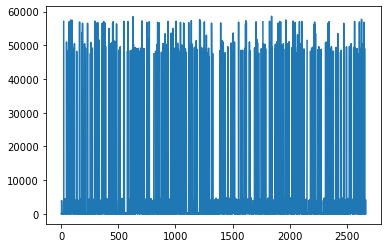

In [80]:
df['close'].plot()

<AxesSubplot:>

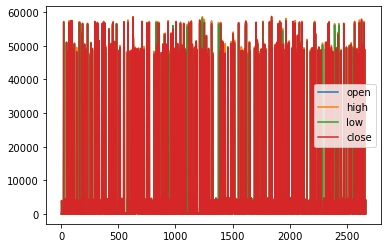

In [82]:
df[['open', 'high', 'low', 'close']].plot()

<AxesSubplot:>

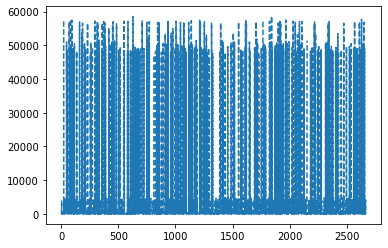

In [85]:
df['close'].plot(style='--')